# Predicting a Movie Success
## Importing Libraries
First we start with importing our libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## Reading the movie metadata
Here we read the movies metadata.

In [2]:
data = pd.read_csv('../input/movies_metadata.csv')
data.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Checking the metadata
Here we made some checks on the metadata.

In [3]:
data[data['budget'].str.contains('.jpg')].head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like the `budget` column needs some cleaning.

# Preparing the data
Setting the X and y training data.

In [18]:
training_data = data[~data['budget'].str.contains('.jpg')]

# Declaring X_training_data
#X_training_data = training_data[['budget', 'runtime']]
X_training_data = training_data[['budget', 'runtime', 'vote_average']]
X_training_data = X_training_data.fillna(0)
X_training_data.head()

,budget,runtime,vote_average
0,30000000,81.0,7.7
1,65000000,104.0,6.9
2,0,101.0,6.5
3,16000000,127.0,6.1
4,0,106.0,5.7


In [19]:
# Declaring y_target_data
y_target_data = training_data[['revenue'][0]].fillna(0)
y_target_data.fillna(0)
y_target_data.head()

0    373554033.0
1    262797249.0
2            0.0
3     81452156.0
4     76578911.0
Name: revenue, dtype: float64

Getting the min of the revenue just in case it's lower than 0.

In [6]:
y_target_data.min()

0.0

## Counting the X and y dataframes

In [20]:
y_target_data.count()

45463

In [31]:
X_training_data.count()

budget          45463
runtime         45463
vote_average    45463
dtype: int64

## Ploting the data
Now we plot the data to find any meaningful relationships

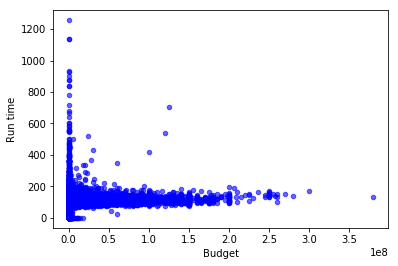

In [9]:
X_training_data[['budget', 'runtime']].astype(float).plot(kind = 'scatter', x  = 'budget' , y = 'runtime' , color = 'blue' , alpha = 0.6)
plt.xlabel('Budget')
plt.ylabel('Run time')
plt.show()

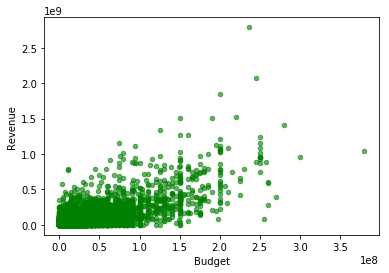

In [10]:
training_data[['budget', 'revenue']].astype(float).plot(kind = 'scatter', x  = 'budget' , y = 'revenue' , color = 'green' , alpha = 0.6)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

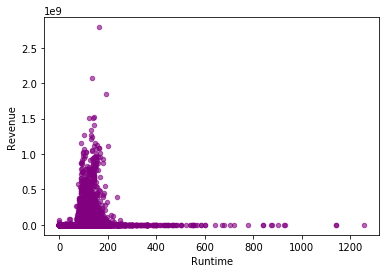

In [11]:
training_data[['runtime', 'revenue']].astype(float).plot(kind = 'scatter', x  = 'runtime' , y = 'revenue' , color = 'purple' , alpha = 0.6)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()

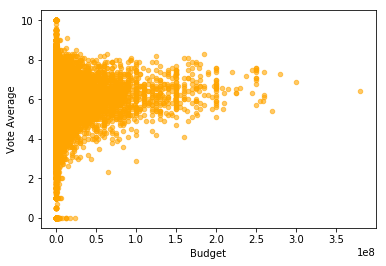

In [23]:
training_data[['budget', 'vote_average']].astype(float).plot(kind = 'scatter', x  = 'budget' , y = 'vote_average' , color = 'orange' , alpha = 0.6)
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.show()

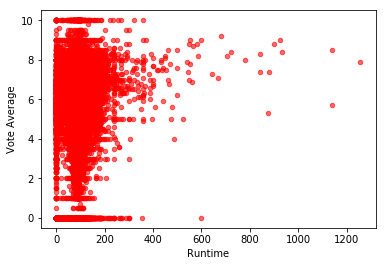

In [24]:
training_data[['runtime', 'vote_average']].astype(float).plot(kind = 'scatter', x  = 'runtime' , y = 'vote_average' , color = 'red' , alpha = 0.6)
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.show()

It looks like there's a relationship between the `budget`, `revenue` and `vote_average`.

## Setting target and training data

In [33]:
y = np.asarray(y_target_data).astype(np.float)
X = np.asarray(X_training_data).astype(np.float)
print(y)
print(X)

[3.73554033e+08 2.62797249e+08 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[[3.00e+07 8.10e+01 7.70e+00]
 [6.50e+07 1.04e+02 6.90e+00]
 [0.00e+00 1.01e+02 6.50e+00]
 ...
 [0.00e+00 9.00e+01 3.80e+00]
 [0.00e+00 8.70e+01 0.00e+00]
 [0.00e+00 7.50e+01 0.00e+00]]


# Training Linear Lasso model
Since the dataset is less than 100K.

In [34]:
lasso_model = linear_model.Lasso(alpha=0.4, tol=0.1)
lasso_model.fit(X, y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.1, warm_start=False)

Since the model is already trained let's predict the Avengers Endgame movie using the budget and the runtime.

In [35]:
res = lasso_model.predict([[356000000, 181, 8.7]])

## Results

For the Avengers Endgame the predicted revenue is 1 Billion dollars, very close to what they made on the Box Office in USA 800M.

In [37]:
res[0]

1010015553.9396163

Let's now predict the success of the first Avengers movie

In [40]:
res = lasso_model.predict([[220000000, 143, 8.0]])
res[0]

624359781.3536041

The predicted value is 624M dollars very similar to the Box Office Gross in USA 623M dollars

Now let's do it with the Fast and Furious Movie

In [41]:
res = lasso_model.predict([[38000000, 143, 6.8]])
res[0]

107650470.26275218

The gross box office in USA was 144M dollars, the predicted revenue that the model gives is 107M